In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification

from models import (
    LinearRegression, LocallyWeightedLinearRegression,
    LogisticRegression
)

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0)

model = LogisticRegression()
costs = model.fit(X, y)

Loss on iteration 10: -24.476751241749774
Loss on iteration 20: -22.35047278607653
Loss on iteration 30: -21.383322430284313
Loss on iteration 40: -20.77743397862713
Loss on iteration 50: -20.339976407403178
Loss on iteration 60: -20.001258980559445
Loss on iteration 70: -19.728916549218553
Loss on iteration 80: -19.505028327150548
Loss on iteration 90: -19.318345399019698
Loss on iteration 100: -19.16115742331815


Loss on iteration 10: 203.42462447083122
Loss on iteration 20: 193.79934341901566
Loss on iteration 30: 193.6953170092869
Loss on iteration 40: 193.69347317717057
Loss on iteration 50: 193.6934394735392
Loss on iteration 60: 193.69343885658074


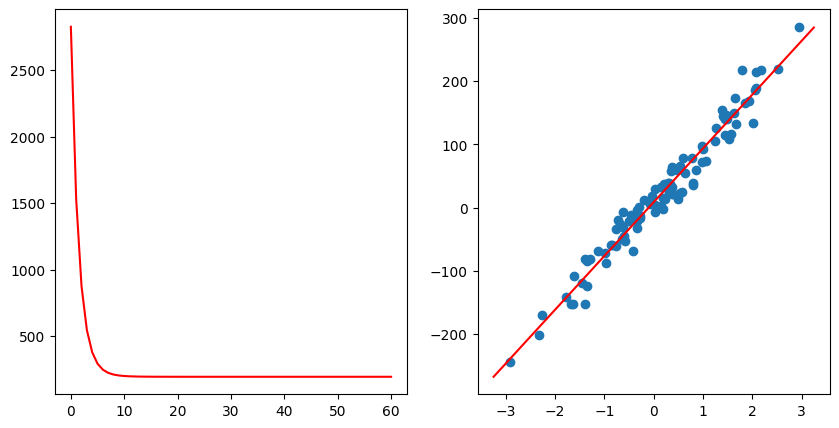

In [5]:
X, y, coef = make_regression(n_samples=100,
                             n_features=1,
                             bias=10,
                             noise=20,
                             coef=True)

model = LinearRegression()
costs = model.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(costs, c='r')
ax[1].scatter(X, y)
x_vals = np.linspace(-3.25, 3.25).reshape(-1, 1)
y_vals = model.predict(x_vals)
ax[1].plot(x_vals, y_vals, c='r')
plt.show()

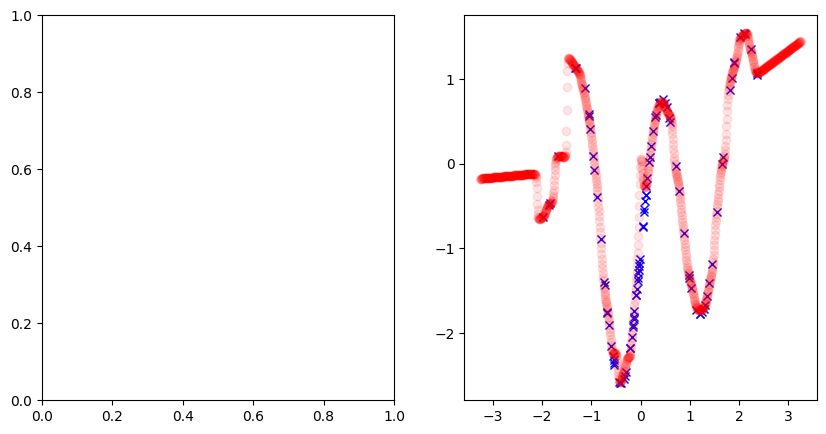

In [4]:
X, y, coef = make_regression(n_samples=100,
                             n_features=1,
                             bias=0,
                             noise=0,
                             coef=True)
y = (0.5*np.sin(X*3) + 1.2*np.sin(X*4) - np.cos(X)).squeeze()

model = LocallyWeightedLinearRegression(tau=0.05)
costs = model.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[1].plot(X, y, 'bx')
x_vals = np.linspace(-3.25, 3.25, 1000).reshape(-1, 1)
y_vals = model.predict(x_vals)
ax[1].plot(x_vals, y_vals, 'ro', alpha=0.1)
plt.show()

KeyboardInterrupt: 

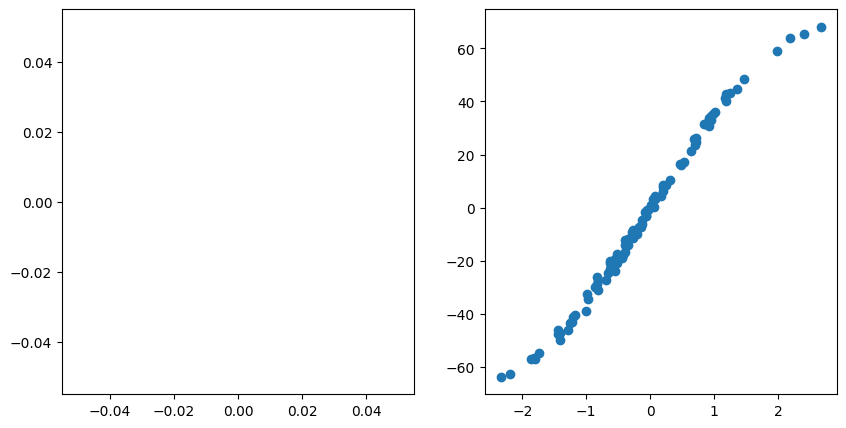

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=1.5)
y = y - 1.5*np.power(X.squeeze(), 3) + 2*np.sin(X.squeeze())

iters = 10000
lr = 1
tau = 0.8
m = X.shape[0]

costs = []

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(costs, c='r')
ax[1].scatter(X, y)

x_vals = np.linspace(-3.25, 3.25).reshape(-1, 1)
y_vals = []
for xi in x_vals:
    initial_w = np.array([0.])
    initial_b = 0.
    weights = np.exp(-np.power(xi - X, 2) / (2*(tau**2))).squeeze()

    for i in range(iters):
        y_pred = X.dot(initial_w) + initial_b

        # compute gradient
        dw = 1/m * np.sum(weights * (y - y_pred) * X.squeeze())
        db = 1/m * np.sum(weights * (y - y_pred))

        initial_w = initial_w + (lr * dw)
        initial_b = initial_b + (lr * db)

    y_vals.append(xi.dot(initial_w) + initial_b)

ax[1].plot(x_vals, y_vals, c='r')
plt.show()